In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this session, we will play with simple models on supervised and unsupervised learning on the ADNI dataset.

Alzheimer's Disease Neuroimaging Initiative (ADNI) is a multisite study that aims to improve clinical trials for the prevention and treatment of Alzheimer's Disease. It includes imaging (MRI and PET) and genetic data with complete assessment and medical history.

Now, we will explore the T1 MRI data.

For more details on ADNI: https://adni.loni.usc.edu/


In [2]:
# NOTE: you may need to change the path
df = pd.read_csv('drive/MyDrive/pysc221/ROI_filtered_quality_normalzied.csv')



Columns named starting with "ST" are brain ROI values. Specifically, a 3D brain volume is segmented into many regions-of-interest (ROIs) by a tool called "FreeSurfer". For each ROI, volume, surface area, and mean+std of cortical thickness could be computed. These ROI values will be used as imaging features. Note, each feature has been normalized to standard score (https://en.wikipedia.org/wiki/Standard_score).

For more details on the segmentation: https://adni.bitbucket.io/reference/docs/UCSFFSX51/UCSF%20FreeSurfer%20Methods%20and%20QC_OFFICIAL.pdf.

For more details on the meaning of the columns: https://adni.bitbucket.io/reference/ucsffresfr.html


In [3]:
df[:3]

,RID,PTID,VISCODE,VISCODE2,EXAMDATE_bl,DX_bl,AGE,PTGENDER,EXAMDATE_img,days_after_bl,VERSION,LONISID,LONIUID,IMAGEUID,RUNDATE,STATUS,OVERALLQC,TEMPQC,FRONTQC,PARQC,INSULAQC,OCCQC,BGQC,CWMQC,VENTQC,ST101SV,ST102CV,ST102SA,ST102TA,ST102TS,ST103CV,ST103SA,ST103TA,ST103TS,ST104CV,ST104SA,ST104TA,ST104TS,ST105CV,ST105SA,ST105TA,ST105TS,ST106CV,ST106SA,ST106TA,ST106TS,ST107CV,ST107SA,ST107TA,ST107TS,ST108CV,ST108SA,ST108TA,ST108TS,ST109CV,ST109SA,ST109TA,ST109TS,ST10CV,ST110CV,ST110SA,ST110TA,ST110TS,ST111CV,ST111SA,ST111TA,ST111TS,ST112SV,ST113CV,ST113SA,ST113TA,ST113TS,ST114CV,ST114SA,ST114TA,ST114TS,ST115CV,ST115SA,ST115TA,ST115TS,ST116CV,ST116SA,ST116TA,ST116TS,ST117CV,ST117SA,ST117TA,ST117TS,ST118CV,ST118SA,ST118TA,ST118TS,ST119CV,ST119SA,ST119TA,ST119TS,ST11SV,ST120SV,ST121CV,ST121SA,ST121TA,ST121TS,ST124SV,ST125SV,ST127SV,ST128SV,ST129CV,ST129SA,ST129TA,ST129TS,ST12SV,ST130CV,ST130SA,ST130TA,ST130TS,ST13CV,ST13SA,ST13TA,ST13TS,ST14CV,ST14SA,ST14TA,ST14TS,ST15CV,ST15SA,ST15TA,ST15TS,ST16SV,ST17SV,ST18SV,ST1SV,ST21SV,ST23CV,ST23SA,ST23TA,ST23TS,ST24CV,ST24SA,ST24TA,ST24TS,ST25CV,ST25SA,ST25TA,ST25TS,ST26CV,ST26SA,ST26TA,ST26TS,ST29SV,ST2SV,ST30SV,ST31CV,ST31SA,ST31TA,ST31TS,ST32CV,ST32SA,ST32TA,ST32TS,ST34CV,ST34SA,ST34TA,ST34TS,ST35CV,ST35SA,ST35TA,ST35TS,ST36CV,ST36SA,ST36TA,ST36TS,ST37SV,ST38CV,ST38SA,ST38TA,ST38TS,ST39CV,ST39SA,ST39TA,ST39TS,ST3SV,ST40CV,ST40SA,ST40TA,ST40TS,ST42SV,ST43CV,ST43SA,ST43TA,ST43TS,ST44CV,ST44SA,ST44TA,ST44TS,ST45CV,ST45SA,ST45TA,ST45TS,ST46CV,ST46SA,ST46TA,ST46TS,ST47CV,ST47SA,ST47TA,ST47TS,ST48CV,ST48SA,ST48TA,ST48TS,ST49CV,ST49SA,ST49TA,ST49TS,ST4SV,ST50CV,ST50SA,ST50TA,ST50TS,ST51CV,ST51SA,ST51TA,ST51TS,ST52CV,ST52SA,ST52TA,ST52TS,ST53SV,ST54CV,ST54SA,ST54TA,ST54TS,ST55CV,ST55SA,ST55TA,ST55TS,ST56CV,ST56SA,ST56TA,ST56TS,ST57CV,ST57SA,ST57TA,ST57TS,ST58CV,ST58SA,ST58TA,ST58TS,ST59CV,ST59SA,ST59TA,ST59TS,ST5SV,ST60CV,ST60SA,ST60TA,ST60TS,ST61SV,ST62CV,ST62SA,ST62TA,ST62TS,ST65SV,ST66SV,ST68SV,ST69SV,ST6SV,ST70SV,ST71SV,ST72CV,ST72SA,ST72TA,ST72TS,ST73CV,ST73SA,ST73TA,ST73TS,ST74CV,ST74SA,ST74TA,ST74TS,ST75SV,ST76SV,ST77SV,ST7SV,ST80SV,ST82CV,ST82SA,ST82TA,ST82TS,ST83CV,ST83SA,ST83TA,ST83TS,ST84CV,ST84SA,ST84TA,ST84TS,ST85CV,ST85SA,ST85TA,ST85TS,ST88SV,ST89SV,ST90CV,ST90SA,ST90TA,ST90TS,ST91CV,ST91SA,ST91TA,ST91TS,ST93CV,ST93SA,ST93TA,ST93TS,ST94CV,ST94SA,ST94TA,ST94TS,ST95CV,ST95SA,ST95TA,ST95TS,ST96SV,ST97CV,ST97SA,ST97TA,ST97TS,ST98CV,ST98SA,ST98TA,ST98TS,ST99CV,ST99SA,ST99TA,ST99TS,ST9SV,update_stamp,VISCODE_diag,EXAMDATE_diag,days_after_bl_diag,DX,ADAS13,CDRSB,MMSE
0,3,011_S_0003,sc,sc,2005-09-12,AD,81.3,Male,2005-09-01,-11,2009-07-01,1948.0,9127.0,32237,2009-07-01,complete,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,1.281508,-0.230547,0.997442,-1.172402,0.438929,0.127364,0.920167,-0.796404,0.214343,-0.204378,0.117915,-0.411947,2.063695,-0.617670,0.079499,-0.811213,0.402937,1.281955,1.296004,0.238518,0.183238,-0.520899,0.296210,-1.731400,0.165141,-1.216155,-0.343495,-1.591340,0.774943,2.365242,2.565920,-0.848701,1.533636,2.567619,-0.316347,0.774006,-1.038871,0.782090,0.143021,0.618428,-0.324365,-1.019472,0.822230,-1.038509,-0.731000,-0.480751,-1.520544,0.020551,0.873667,-0.990105,-0.167841,0.584087,1.136847,-0.337388,1.269476,-0.496000,-0.274372,-0.614568,0.483183,0.271416,1.072276,-0.947227,2.182724,0.385315,0.691797,-0.286932,1.612245,-1.567611,-0.494901,-1.586646,-0.245530,-0.788242,0.704915,1.164981,0.797271,0.495190,1.657207,1.003690,1.429515,1.873229,6.693097,-0.349439,1.015637,-1.785982,0.099399,-0.474103,-0.418974,0.344173,-1.405677,-0.790924,-0.439432,-0.470824,0.041204,-0.094627,-1.263303,-0.759470,-1.316699,0.609041,-1.351121,-1.666046,0.496026,0.889805,2.597206,-1.253969,1.737941,1.169837,3.681962,0.278668,1.185747,-1.112642,-0.868689,-1.111215,2.338739,-2.522981,1.435359,-0.642946,-0.632198,-0.373271,0.915346,-0.516718,0.335868,-1.363495,0.447652,-0.487507,0.547509,6.345959,-0.965027,-0.726171,-0.794466,-0.202400,0.045997,0.822699,-0.757121,-1.280833,-1.243834,-0.413968,-1.520

In [4]:
# TODO:
# how many MRIs in total? (hint: each row is an MRI)
# how many unique subjects? (hint: unique RID)
print('No. of MRIs', len(df))
print('No. of subjects', df['RID'].unique().shape[0])

No. of MRIs 5914
No. of subjects 1305


In [5]:
# TODO: how many roi features in total?
roi_cols = [col for col in df if 'ST' in col and col != 'STATUS']
print(len(roi_cols))

313


In [6]:
# TODO: column DX represents the diagnosis when the MRI was scanned.
# It could be CN-control, MCI-mild cognitive impairment, and Dementia.
# how many MRIs in each category?
print('No. CN MRIs', (df['DX']=='CN').sum())
print('No. MCI MRIs', (df['DX']=='MCI').sum())
print('No. Dementia MRIs', (df['DX']=='Dementia').sum())

No. CN MRIs 1836
No. MCI MRIs 2812
No. Dementia MRIs 1266


### Now, let's build several simple models to classify CN vs. Dementia.

In [7]:
#  only keep NC and Dementia MRIs
df_sel = df.loc[df['DX']!='MCI'].reset_index(drop=True)
# df_sel = df.loc[df['DX']!='CN'].reset_index(drop=True)
# df_sel = df.loc[df['DX']!='Dementia'].reset_index(drop=True)

# split train vs test based on subject
# TODO: think why the split of train/test should be based on subject?
subj_rid_list = df_sel['RID'].unique()
train_subj_rid_list, test_subj_rid_list = train_test_split(subj_rid_list, test_size=0.2, random_state=2)
print('Num. of train subjects', len(train_subj_rid_list))
print('Num. of test subjects', len(test_subj_rid_list))

train_idx_list = np.where(df_sel['RID'].isin(train_subj_rid_list))[0]
test_idx_list = np.where(df_sel['RID'].isin(test_subj_rid_list))[0]
print('Num. of train MRIs', len(train_idx_list))
print('Num. of test MRIs', len(test_idx_list))

Num. of train subjects 688
Num. of test subjects 172
Num. of train MRIs 2469
Num. of test MRIs 633


In [8]:
# define features and labels
X = np.array(df_sel[roi_cols])

def match_label(x):
    if x == 'CN':
        return 0
    if x == 'MCI':
        return 1
    return 2
Y = np.array(df_sel['DX'].apply(match_label))
# Y=1: Dementia, Y=0: Control
Y = Y / 2
# Y=1: Dementia, Y=0: MCI
# Y = Y - 1

print(X.shape, Y.shape)

X_train, X_test = X[train_idx_list], X[test_idx_list]
Y_train, Y_test = Y[train_idx_list], Y[test_idx_list]

# Note, all ROI values in the table has been normalized to standard score, which is the general way for data preprocessing.
# https://en.wikipedia.org/wiki/Standard_score

(3102, 313) (3102,)


#### Logistic Regression

In [9]:
# TODO: build a logistic regression model to classify control vs dementia
# hint: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# try with different penalty option 'none', 'l2', why?
clf = LogisticRegression(random_state=0, penalty='none', max_iter=200)
clf.fit(X_train, Y_train)

train_pred_prob = clf.predict_proba(X_train)
test_pred_prob = clf.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [10]:
# TODO: evaluate the performance on test set (accuracy, balanced accuracy, precision, recall, f1, auc)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
print('Train Accuracy:', accuracy_score(Y_train, train_pred_prob[:,1]>0.5))

print('Test Accuracy:', accuracy_score(Y_test, test_pred_prob[:,1]>0.5))
print('Test Balanced Accuracy:', balanced_accuracy_score(Y_test, test_pred_prob[:,1]>0.5))
print('Test Recall:', recall_score(Y_test, test_pred_prob[:,1]>0.5))
print('Test Precision:', precision_score(Y_test, test_pred_prob[:,1]>0.5))
print('Test F1:', f1_score(Y_test, test_pred_prob[:,1]>0.5))
print('Test AUC:', roc_auc_score(Y_test, test_pred_prob[:,1]))

Train Accuracy: 1.0
Test Accuracy: 0.8515007898894155
Test Balanced Accuracy: 0.8518537328593194
Test Recall: 0.8545454545454545
Test Precision: 0.8131487889273357
Test F1: 0.8333333333333334
Test AUC: 0.906947689182326


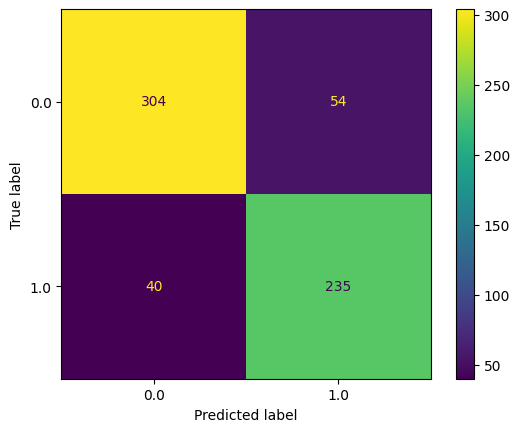

In [11]:
# TODO: plot confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, test_pred_prob[:,1]>0.5, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Text(0.5, 1.0, 'CN vs Dementia (AUC=0.91)')

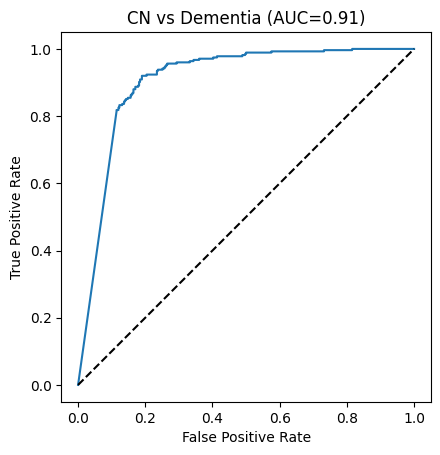

In [12]:
# TODO: plot ROC curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

from sklearn.metrics import  recall_score
fpr, tpr, thresholds = roc_curve(Y_test, test_pred_prob[:,1], pos_label=1)
plt.plot(fpr, tpr, 'tab:blue')
plt.plot([0,1], [0,1], color='black', linestyle='dashed')
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("CN vs Dementia (AUC=%.2f)" % roc_auc_score(Y_test, test_pred_prob[:,1]))

#### Feature Importance

<BarContainer object of 10 artists>

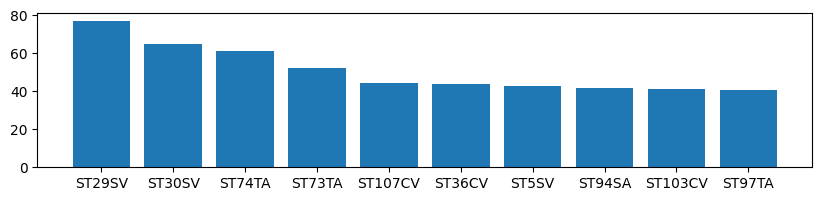

In [13]:
# TODO: what's the top-10 important roi features?
feature_importance = np.mean(np.abs(clf.coef_), axis=0)
idx_sel = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10,2))
plt.bar(np.array(roi_cols)[idx_sel][:10], feature_importance[idx_sel][:10])

In [14]:
# check the meaning of these features: https://adni.bitbucket.io/reference/ucsffresfr.html
# ST29SV N mm3 Volume (WM Parcellation) of LeftHippocampus
# ST30SV N mm3 Volume (WM Parcellation) of LeftInferiorLateralVentricle
# ST74TA N mm Cortical Thickness Average of RightCaudalMiddleFrontal
# ST73TA N mm Cortical Thickness Average of RightCaudalAnteriorCingulate
# ST107CV N mm3 Volume (Cortical Parcellation) of RightPericalcarine
# ST36CV N mm3 Volume (Cortical Parcellation) of LeftLateralOrbitofrontal
# ST5SV N mm3 Volume (WM Parcellation) of CorpusCallosumMidPosterior
# ST94SA N mm2 Surface Area of RightLateralOccipital
# ST103CV N mm3 Volume (Cortical Parcellation) of RightParahippocampal
# ST97TA N mm Cortical Thickness Average of RightLingual

#### SVM

In [15]:
# TODO: build a SVM model to classify control vs dementia
# try with different kernel 'rbf', 'linear'. why?
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

from sklearn.svm import SVC
clf = SVC(gamma='auto', kernel='linear')
clf.fit(X_train, Y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

print('Train Accuracy:', accuracy_score(Y_train, train_pred))
print('Test Accuracy:', accuracy_score(Y_test, test_pred))
print('Test Balanced Accuracy:', balanced_accuracy_score(Y_test, test_pred))
print('Test Recall:', recall_score(Y_test, test_pred))
print('Test Precision:', precision_score(Y_test, test_pred))
print('Test F1:', f1_score(Y_test, test_pred))

Train Accuracy: 0.9995949777237748
Test Accuracy: 0.8578199052132701
Test Balanced Accuracy: 0.8624987303199594
Test Recall: 0.8981818181818182
Test Precision: 0.7993527508090615
Test F1: 0.8458904109589042


KNN

Text(0.5, 1.0, 'AUC')

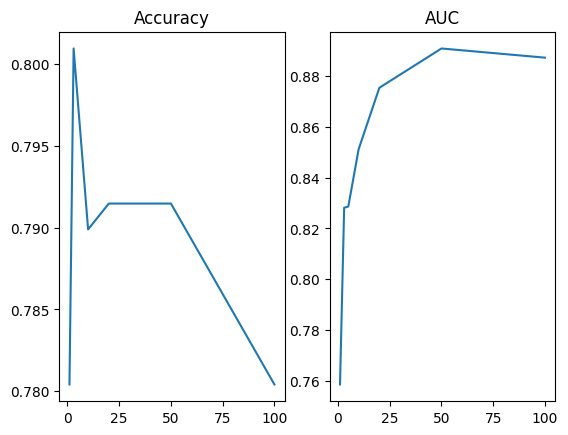

In [16]:
# TODO: build a SVM model to classify control vs dementia
# try with different number of neighbors
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.neighbors import KNeighborsClassifier
auc_list = []
acc_list = []
nbr_list = [1,3,5,10,20,50,100]
for nbr in nbr_list:
    clf = KNeighborsClassifier(n_neighbors=nbr)
    clf.fit(X_train, Y_train)

    test_pred_prob = clf.predict_proba(X_test)
    acc_list.append(accuracy_score(Y_test, test_pred_prob[:,1]>0.5))
    auc_list.append(roc_auc_score(Y_test, test_pred_prob[:,1]))

plt.subplot(121)
plt.plot(nbr_list, acc_list)
plt.title('Accuracy')
plt.subplot(122)
plt.plot(nbr_list, auc_list)
plt.title('AUC')

#### Simple Neural Network

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

trainloader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(torch.tensor(X_train), torch.tensor(Y_train.reshape(-1,1)).to(torch.float32)),
    batch_size=32,
    shuffle=True,
)
testloader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(torch.tensor(X_test), torch.tensor(Y_test.reshape(-1,1)).to(torch.float32)),
    batch_size=32,
    shuffle=False,
)

# TODO: build a simple neural network (with fully connected layers and activations) to classify CN vs Dementia.
# Try with different number of layers, learning rate
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(313, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = x.to(torch.float32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(), lr=0.002, momentum=0.9)

acc_list = []
auc_list = []
acc_list_train = []
auc_list_train = []
loss_list_train = []
for epoch in range(30):  # loop over the dataset multiple times
    net.train()
    running_loss = 0.0
    outputs_list = []
    labels_list = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        labels_list.append(labels.detach().numpy())
        outputs_list.append(outputs.detach().numpy())

    loss_list_train.append(running_loss / (i+1))
    labels_list = np.concatenate(labels_list, axis=0)
    outputs_list = np.concatenate(outputs_list, axis=0)

    acc_list_train.append(accuracy_score(labels_list, outputs_list>0.5))
    auc_list_train.append(roc_auc_score(labels_list, outputs_list))

    net.eval()
    outputs_list = []
    labels_list = []
    for i, data in enumerate(testloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # forward + backward + optimize
        outputs = net(inputs)

        labels_list.append(labels.detach().numpy())
        outputs_list.append(outputs.detach().numpy())

    labels_list = np.concatenate(labels_list, axis=0)
    outputs_list = np.concatenate(outputs_list, axis=0)

    acc_list.append(accuracy_score(labels_list, outputs_list>0.5))
    auc_list.append(roc_auc_score(labels_list, outputs_list))

    print('Epoch ', epoch, 'Accuracy', acc_list[-1], 'AUC', auc_list[-1])

print('Finished Training')

Epoch  0 Accuracy 0.5655608214849921 AUC 0.8057084814626714
Epoch  1 Accuracy 0.6966824644549763 AUC 0.8241137633316404
Epoch  2 Accuracy 0.764612954186414 AUC 0.8604977145759267
Epoch  3 Accuracy 0.8451816745655608 AUC 0.9004062976130016
Epoch  4 Accuracy 0.8751974723538705 AUC 0.9203961401726765
Epoch  5 Accuracy 0.8767772511848341 AUC 0.9274250888776028
Epoch  6 Accuracy 0.8815165876777251 AUC 0.934362620619604
Epoch  7 Accuracy 0.8894154818325435 AUC 0.9361909598781109
Epoch  8 Accuracy 0.8925750394944708 AUC 0.9346673438293551
Epoch  9 Accuracy 0.8925750394944708 AUC 0.9360893854748603
Epoch  10 Accuracy 0.8973143759873617 AUC 0.9347079735906552
Epoch  11 Accuracy 0.8973143759873617 AUC 0.9331234128999493
Epoch  12 Accuracy 0.9083728278041074 AUC 0.9356119857795836
Epoch  13 Accuracy 0.9052132701421801 AUC 0.93602844083291
Epoch  14 Accuracy 0.9067930489731437 AUC 0.9346978161503301
Epoch  15 Accuracy 0.9083728278041074 AUC 0.9357846622651093
Epoch  16 Accuracy 0.9115323854660348 

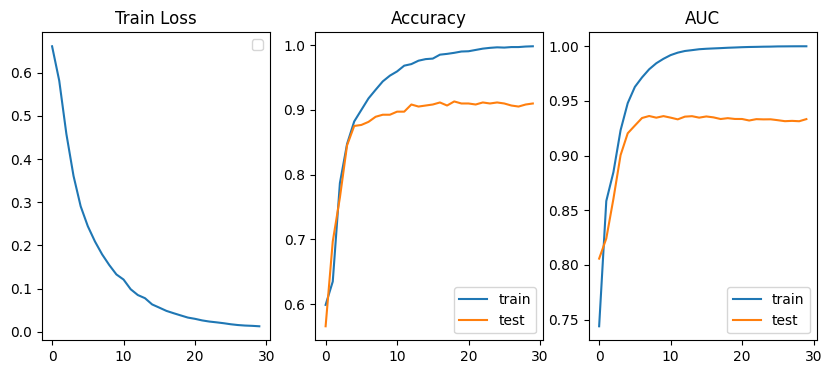

In [18]:
n_epoch = 30
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.plot(np.arange(n_epoch), loss_list_train)
plt.title('Train Loss')
plt.legend()
plt.subplot(132)
plt.plot(np.arange(n_epoch), acc_list_train, label='train')
plt.plot(np.arange(n_epoch), acc_list, label='test')
plt.title('Accuracy')
plt.legend()
plt.subplot(133)
plt.plot(np.arange(n_epoch), auc_list_train, label='train')
plt.plot(np.arange(n_epoch), auc_list, label='test')
plt.title('AUC')
plt.legend()

### Unsupervised Learning
#### K-means

In [19]:
# TODO: build a Kmeans model to cluster the train data into 2 clusters
# compare the true test label with the clustering results
# how does the performance compare with the supervised learning methods?
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train)
if (kmeans.labels_ == Y_train).sum() > (kmeans.labels_ == 1-Y_train).sum():
    test_pred = kmeans.predict(X_test)
    train_pred = kmeans.labels_
else:
    test_pred = 1 - kmeans.predict(X_test)
    train_pred = 1 - kmeans.labels_

print('Train Accuracy:', accuracy_score(Y_train, train_pred))
print('Test Accuracy:', accuracy_score(Y_test, test_pred))
print('Test Balanced Accuracy:', balanced_accuracy_score(Y_test, test_pred))
print('Test Recall:', recall_score(Y_test, test_pred))
print('Test Precision:', precision_score(Y_test, test_pred))
print('Test F1:', f1_score(Y_test, test_pred))

Train Accuracy: 0.7334953422438234
Test Accuracy: 0.674565560821485
Test Balanced Accuracy: 0.659598781107161
Test Recall: 0.5454545454545454
Test Precision: 0.6493506493506493
Test F1: 0.592885375494071


#### PCA

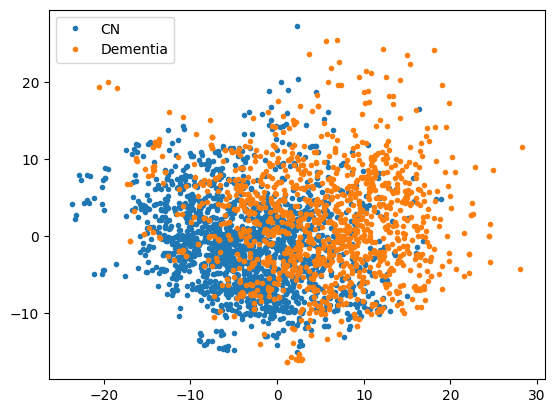

In [20]:
# TODO: do dimension reduction by PCA, visualize the results in 2D
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.plot(X_2d[Y==0, 0], X_2d[Y==0, 1], '.', label='CN')
plt.plot(X_2d[Y==1, 0], X_2d[Y==1, 1], '.', label='Dementia')
plt.legend()

#### Age Prediction (plan to remove)

In [21]:
df_sel = df

# split train vs test based on subject
# TODO: think why the split of train/test should be based on subject?
subj_rid_list = df_sel['RID'].unique()
train_subj_rid_list, test_subj_rid_list = train_test_split(subj_rid_list, test_size=0.2, random_state=2)
print('Num. of train subjects', len(train_subj_rid_list))
print('Num. of test subjects', len(test_subj_rid_list))

train_idx_list = np.where(df_sel['RID'].isin(train_subj_rid_list))[0]
test_idx_list = np.where(df_sel['RID'].isin(test_subj_rid_list))[0]
print('Num. of train MRIs', len(train_idx_list))
print('Num. of test MRIs', len(test_idx_list))

# define features and labels
X = np.array(df_sel[roi_cols])

def match_label(x):
    if x == 'CN':
        return 0
    if x == 'MCI':
        return 1
    return 2
Y = np.array(df_sel['AGE'] + df_sel['days_after_bl'] / 365.)
print(X.shape, Y.shape)

X_train, X_test = X[train_idx_list], X[test_idx_list]
Y_train, Y_test = Y[train_idx_list], Y[test_idx_list]

# Note, all ROI values in the table has been normalized to standard score, which is the general way for data preprocessing.
# https://en.wikipedia.org/wiki/Standard_score

Num. of train subjects 1044
Num. of test subjects 261
Num. of train MRIs 4709
Num. of test MRIs 1205
(5914, 313) (5914,)


In [22]:
from sklearn import linear_model
# reg = linear_model.LinearRegression()
reg = linear_model.Ridge(alpha=1.)
reg.fit(X_train, Y_train)
train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('Train RMSE', mean_squared_error(Y_train, train_pred, squared=False))
print('Train R2', r2_score(Y_train, train_pred))
print('Test RMSE', mean_squared_error(Y_test, test_pred, squared=False))
print('Test R2', r2_score(Y_test, test_pred))

Train RMSE 3.9515466070146887
Train R2 0.697500161195226
Test RMSE 5.94766805153962
Test R2 0.3461325250672904


Text(0.5, 1.0, 'Chronological Age Prediction')

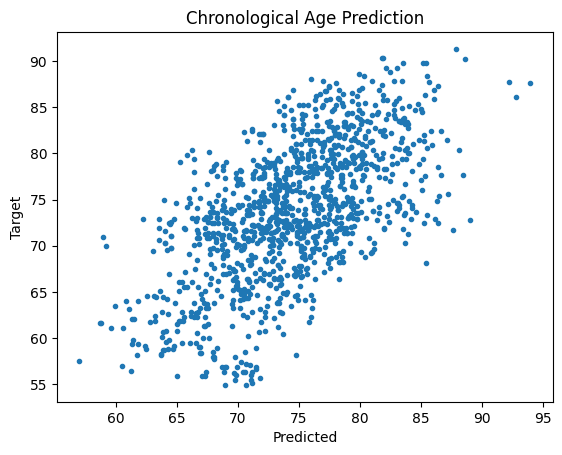

In [24]:
plt.plot(test_pred, Y_test, '.')
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Chronological Age Prediction')